In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pprint
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d

In [2]:
data = pd.read_csv("../00_data/data_with_calc_fields.csv", sep=";", decimal=",", index_col="datetime")

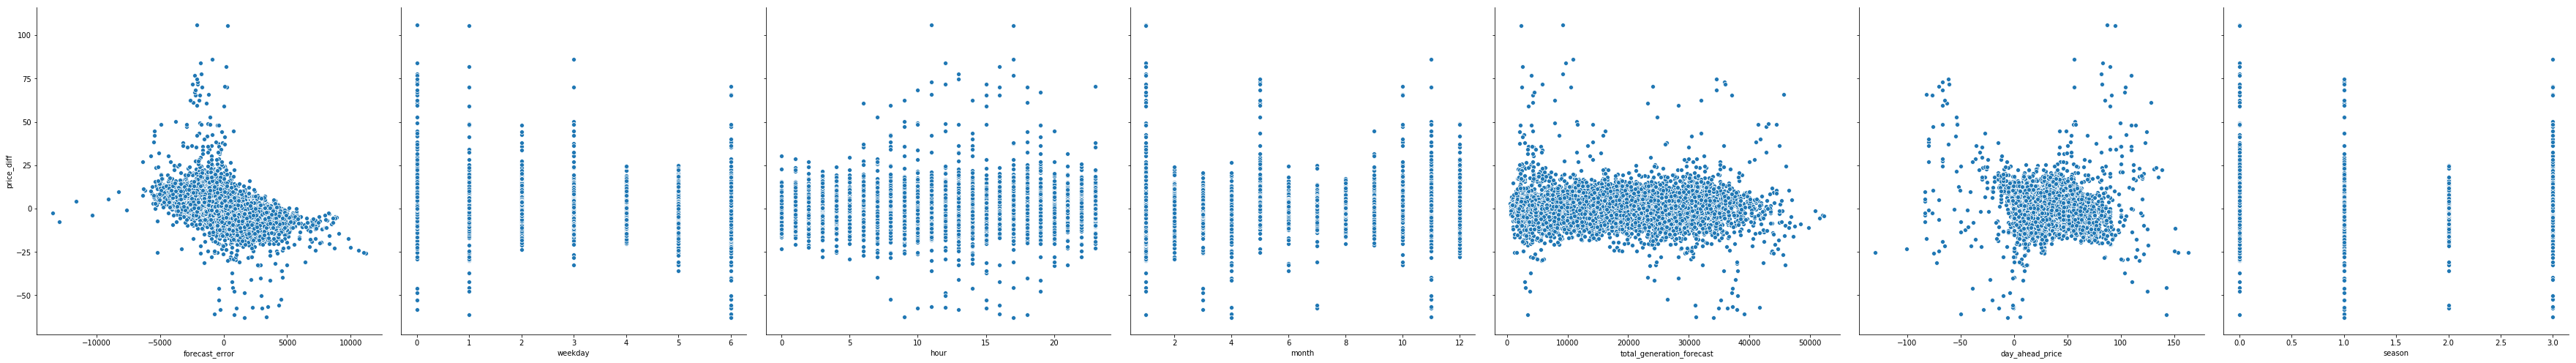

In [3]:
# visualize the relationship between the features and the response using scatterplots
sns.pairplot(data, x_vars=["forecast_error", "weekday", "hour", "month", "total_generation_forecast", "day_ahead_price", "season"], y_vars=["price_diff"], height=7)

C:\Users\Tabea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


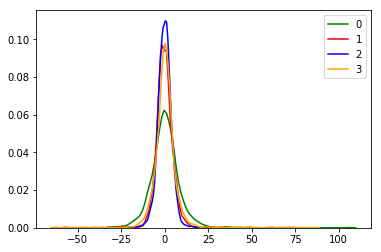

In [4]:
colors = ["g", "r", "b", "orange"]
for w in range(4):
    sns.kdeplot(data[(data.season==w)].price_diff, label=w, color=colors[w])

C:\Users\Tabea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Tabea\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Tabea\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Tabea\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


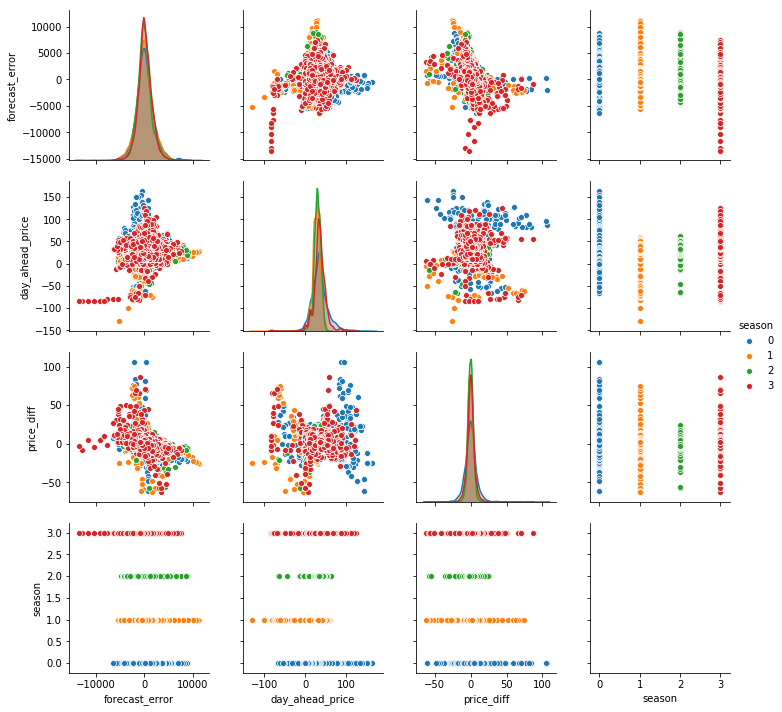

In [5]:
sns.pairplot(data[["forecast_error", "day_ahead_price", "price_diff", "season"]], hue="season")

In [6]:
season_dummies = pd.get_dummies(data.season, prefix='season').iloc[:, :-1]
data = pd.concat([data, season_dummies], axis=1)

                            OLS Regression Results                            
Dep. Variable:             price_diff   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     556.0
Date:                Mon, 31 Dec 2018   Prob (F-statistic):               0.00
Time:                        11:12:03   Log-Likelihood:                -34020.
No. Observations:               10525   AIC:                         6.805e+04
Df Residuals:                   10519   BIC:                         6.810e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               1.9511      0.182     

C:\Users\Tabea\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


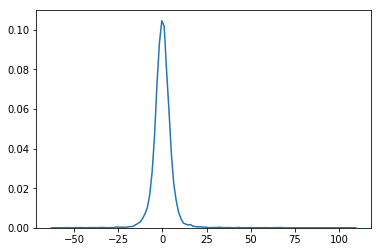

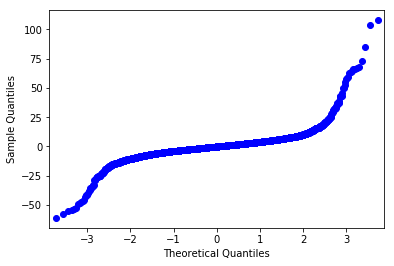

In [7]:
y = data["price_diff"]
feature_cols = ["forecast_error", "day_ahead_price"]+list(season_dummies)
r_sqr = list()
for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(data[feature_cols], y, test_size=0.4)

    ## fit a OLS model with intercept
    X_train = sm.add_constant(X_train)
    est = sm.OLS(y_train, X_train).fit()
    r_sqr.append(est.rsquared_adj)
print(est.summary())
print(sum(r_sqr)/len(r_sqr))
X_test = sm.add_constant(X_test)
pred = est.predict(X_test)
sns.kdeplot(est.resid)
sm.qqplot(est.resid)
plt.show()

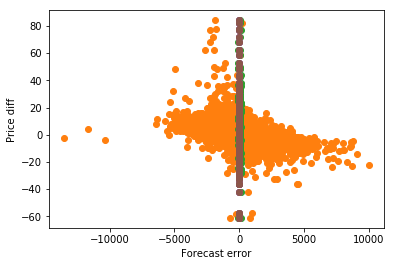

No handles with labels found to put in legend.


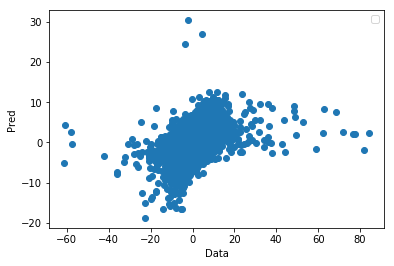

In [8]:
plt.plot(X_test, y_test, 'o', label="Data")
plt.xlabel("Forecast error")
plt.ylabel("Price diff")
plt.show()
plt.scatter(y_test, pred)
plt.xlabel("Data")
plt.ylabel("Pred")
plt.legend(loc="best");
plt.show()

No handles with labels found to put in legend.


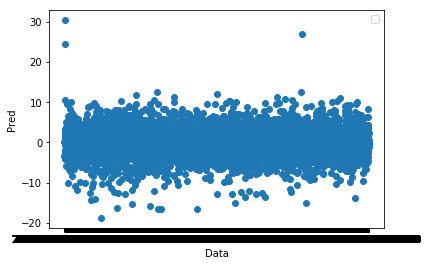

In [9]:
plt.scatter(X_test.index.values, pred)
plt.xlabel("Data")
plt.ylabel("Pred")
plt.legend(loc="best");
plt.show()